In [2]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt

from mnist.model import Model
from mnist.training import Training
from data.dataset import get_mnist_data
%load_ext autoreload
%autoreload 2

In [ ]:
train_loader, val_loader, test_loader = get_mnist_data(validation_split=.2)

print(f"Length of training data: {len(train_loader)}")
print(f"Length of validation data: {len(val_loader)}")

model = Model()

trainer = Training(model, val_loader=val_loader, train_loader=train_loader)

training_loss, validation_loss = trainer.train(epochs=30)

Length of training data: 750
Length of validation data: 188
epoch:  0 training on:  750 examples
validating on  188 examples
correct:  11622 total:  12000
Test Loss: 0.1003, Test Accuracy: 96.85%
epoch:  1 training on:  750 examples
validating on  188 examples
correct:  11786 total:  12000
Test Loss: 0.0600, Test Accuracy: 98.22%
epoch:  2 training on:  750 examples
validating on  188 examples
correct:  11845 total:  12000
Test Loss: 0.0416, Test Accuracy: 98.71%
epoch:  3 training on:  750 examples
validating on  188 examples
correct:  11843 total:  12000
Test Loss: 0.0441, Test Accuracy: 98.69%
epoch:  4 training on:  750 examples
validating on  188 examples
correct:  11866 total:  12000
Test Loss: 0.0346, Test Accuracy: 98.88%
epoch:  5 training on:  750 examples
validating on  188 examples
correct:  11861 total:  12000
Test Loss: 0.0353, Test Accuracy: 98.84%
epoch:  6 training on:  750 examples
validating on  188 examples
correct:  11901 total:  12000
Test Loss: 0.0302, Test Accur

In [4]:
training_loss, validation_loss

([0.18492918997444213,
  0.03888199713709764,
  0.027946716107272854,
  0.02077854517880284,
  0.016803709438235576,
  0.014215276775813739,
  0.005189613455062499,
  0.0018513364878396412,
  0.0021730641300310555,
  0.002086209458391522,
  0.005475965125827315,
  0.0011437333644347897,
  0.00021970142080188755,
  8.46840258523116e-05,
  4.921545760144378e-05],
 [0.10436304258133107,
  0.05577385476251638,
  0.042410852514489734,
  0.050792907569631736,
  0.046911790599396944,
  0.04843099666980746,
  0.038484713730958124,
  0.04743314497942662,
  0.06164876903401461,
  0.050167969646529496,
  0.05093741081178968,
  0.045341133991018856,
  0.04713027365582615,
  0.047684628509880186,
  0.049697053035958595])

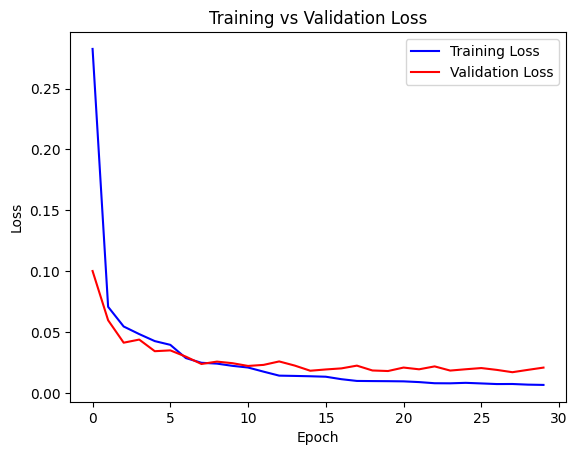

Test data length: 157
validating on  157 examples
correct:  9947 total:  10000
Test Loss: 0.0162, Test Accuracy: 99.47%


0.016201621519369484

In [12]:
# Plot training vs validation loss
plt.plot(training_loss, label="Training Loss", color='b')
plt.plot(validation_loss, label="Validation Loss", color='r')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

print(f"Test data length: {len(test_loader)}")
trainer.test(test_loader)


Answer:  4
tensor([[1.8703e-11, 2.6629e-09, 2.6179e-09, 8.3392e-11, 1.0000e+00, 7.0841e-10,
         1.7137e-09, 3.4486e-08, 1.9225e-09, 2.8273e-07]],
       grad_fn=<SoftmaxBackward0>)
Guess: 4


/var/folders/0d/1x2vhj313rldmkyw74xqfq8h0000gn/T/ipykernel_55812/4156479551.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(F.softmax(output))


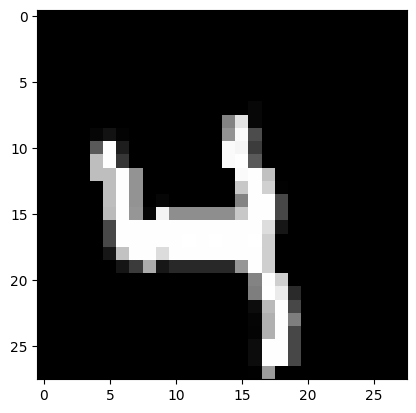

In [140]:
import os, random
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomResizedCrop(28, scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
dataset = datasets.MNIST(root=f'{root_dir}/data', train=False, download=True, transform=transform)

random_idx = random.randint(0, len(dataset) - 1)
x = dataset[random_idx]

print('Answer: ', x[1])

x = x[0].unsqueeze(0)

plt.imshow(x.squeeze(), cmap='gray')
output = model(x)
print(F.softmax(output))
guess = torch.argmax(output, dim=1)
print(f"Guess: {guess.item()}")